In [1]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and the time period
stock_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch historical data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())





[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855103   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937302   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [2]:
# Calculate daily returns and volume changes
data['Daily Return'] = data['Close'].pct_change()
data['Volume Change'] = data['Volume'].pct_change()

# Drop NA values that result from percentage change calculation
data = data.dropna()

print(data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855103   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937302   
2023-01-10  130.259995  131.259995  128.119995  130.729996  129.511871   

              Volume  Daily Return  Volume Change  
Date                                               
2023-01-04  89113600      0.010314      -0.205177  
2023-01-05  80962700     -0.010605      -0.091466  
2023-01-06  87754700      0.036794       0.083890  
2023-01-09  70790800      0.004089      -0.193310  
2023-01-10  63896200      0.004456      -0.097394  


In [3]:
from scipy import stats

# Calculate Z-scores
data['Return Z-Score'] = stats.zscore(data['Daily Return'])
data['Volume Z-Score'] = stats.zscore(data['Volume Change'])

# Define thresholds for anomaly detection
return_threshold = 3  # Z-score threshold for returns
volume_threshold = 3  # Z-score threshold for volume

# Flag anomalies
data['Return Anomaly'] = data['Return Z-Score'].abs() > return_threshold
data['Volume Anomaly'] = data['Volume Z-Score'].abs() > volume_threshold

# Filter rows where anomalies are detected
anomalies = data[(data['Return Anomaly']) | (data['Volume Anomaly'])]

print(anomalies)



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-05  170.979996  174.300003  170.759995  173.570007  172.215256   
2023-06-05  182.630005  184.949997  178.039993  179.580002  178.424820   
2023-06-30  191.630005  194.479996  191.259995  193.970001  192.722244   
2023-08-04  185.520004  187.380005  181.919998  181.990005  180.819305   
2023-12-15  197.529999  198.399994  197.000000  197.570007  196.823120   

               Volume  Daily Return  Volume Change  Return Z-Score  \
Date                                                                 
2023-05-05  113316400      0.046927       0.394914        3.597551   
2023-06-05  121946500     -0.007571       0.968597       -0.748272   
2023-06-30   85069600      0.023103       0.835481        1.697727   
2023-08-04  115799700     -0.048020       0.891064       -3.973778   
2023-12-15  128256700     -0.002726       0.919103       -0.3

C:\Users\SAURAVKAUSHIK\AppData\Local\Temp\ipykernel_26588\2245488088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return Z-Score'] = stats.zscore(data['Daily Return'])
C:\Users\SAURAVKAUSHIK\AppData\Local\Temp\ipykernel_26588\2245488088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Volume Z-Score'] = stats.zscore(data['Volume Change'])
C:\Users\SAURAVKAUSHIK\AppData\Local\Temp\ipykernel_26588\2245488088.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

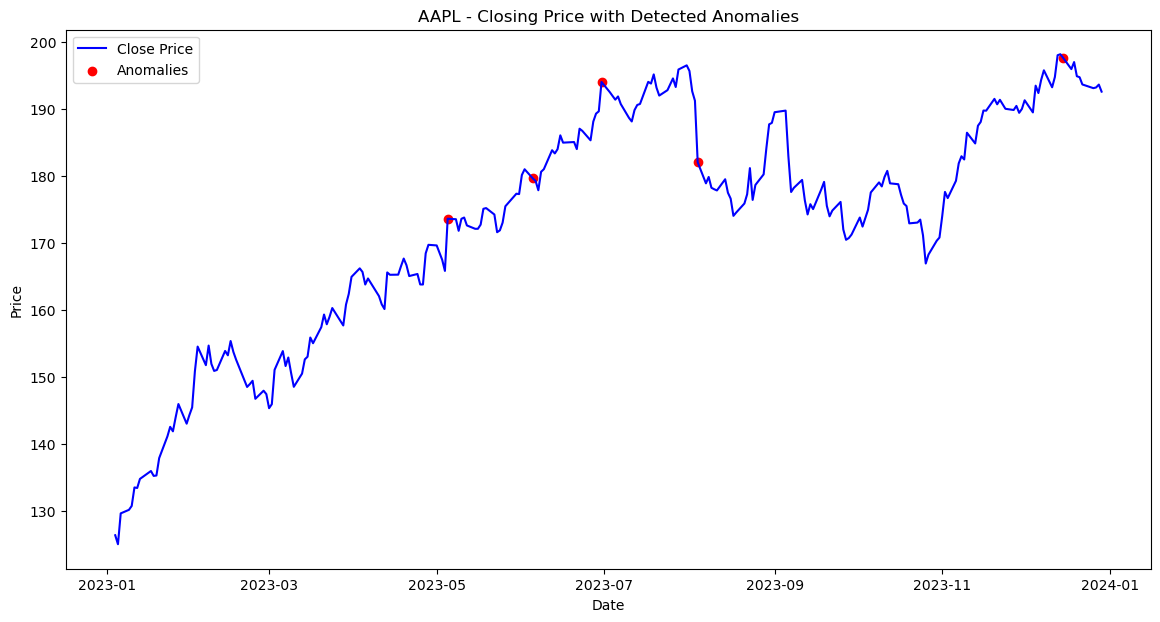

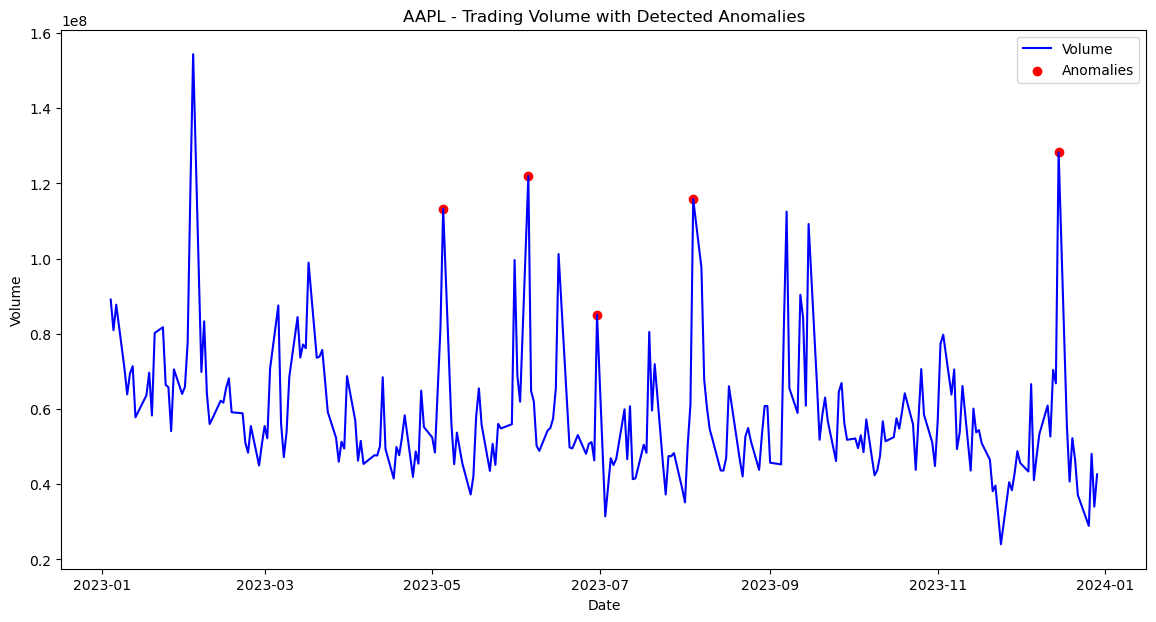

In [4]:
import matplotlib.pyplot as plt

# Plot closing price and highlight anomalies
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies')
plt.title(f'{stock_symbol} - Closing Price with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot volume and highlight anomalies
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume'], label='Volume', color='blue')
plt.scatter(anomalies.index, anomalies['Volume'], color='red', label='Anomalies')
plt.title(f'{stock_symbol} - Trading Volume with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()
